*tool - jupyter notebook

## 마케팅 효과 분석: 마케팅 포인트와 주가와의 상관관계 분석

## 3. 네이버 데이터랩의 검색어 트렌드의 주가 영향력 분석
* 검색어 트렌드 분석을 통한 검색어 증가에 따른 주가 영향 분석
    * 검색어 하락이 주가하락에 상당히 영향을 미치는지 분석
* 마케팅 효과에 따른 검색어 증가량 분석
* 마케팅 수명관리
* 경쟁사 마케팅 파급효과 분석


#### -  reference
* 네이버 디벨로퍼 가입
* 어플리케이션 등록
* https://developers.naver.com/docs/datalab/search/#python

### 0) 네이버 데이터랩 서치
- 함수
    + makeQry(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='date')
        + 네이버 데이터랩 서치에 들어갈 쿼리문 만들기
    + Mynsearch(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='date')
        + 네이버 데이터랩 서치 및 데이터 가져오기
    + MyDataLab(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='month')
        + 가져온 데이터 판다스 df 형태로 만들기

In [1]:
nid = 'JRv5Bq7I5nPjMsJ3pdd3'
nkey = 'tuxU6A6cKW'

In [2]:
# 네이버데이터랩 패키지
import json #####
import os
import sys
import urllib.request

In [3]:
# 시각화 패키지
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

In [4]:
def makeQry(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='date'):
    res=[]
    for words in keywords:
        dict={'groupName':words[0], 'keywords':words}
        res.append(dict)
    rdict = {"startDate":sday,
            "endDate":eday,
            "timeUnit":tunit,
            "keywordGroups":res
            }
    return json.dumps(rdict,ensure_ascii=False)

In [5]:
def Mynsearch(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='date'):
    client_id = nid #####
    client_secret = nkey #####
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body = makeQry(keywords, sday, eday, tunit)
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
        #print(res)
    else:
        res="error"
        print("Error Code:" + rescode)
    return res

In [6]:
def MyDataLab(keywords=[], sday='2019-01-01', eday='2020-08-30', tunit='month'):
    # 네이버 데이터랩 서치
    res = Mynsearch(keywords,sday,eday,tunit)
    #데이터 추출을 위한 json
    #print(res)
    jdata = json.loads(res)
            #print(len(jdata['results']))
    i=0;
    #테이블 머지를 위한 기초테이블
    maindf = pd.DataFrame()
    # 키워드별로 컬럼명 지정
    for words in keywords:
        pdata = jdata['results'][i]['data']
        i+=1
        df = pd.DataFrame.from_dict(pdata)
        # df 컬럼명 재지정
        df.columns=["period",words[0].strip()]
        # period 컬럼을 인덱스로 지정
        df1 = df.set_index("period")
        # 빈 df에 넣어주기
        maindf=pd.merge(maindf,df1,how="outer",left_index=True,right_index=True)
    return maindf

               극한직업      사바하      걸캅스    나쁜녀석들
period                                        
2019-01-01  0.81793  0.05995  0.01879  0.24997
2019-01-02  0.94142  0.05831  0.02162  0.22685
2019-01-03  0.91771  0.04578  0.01566  0.18106
2019-01-04  8.13203  0.04399  0.02475  0.19866
2019-01-05  1.80633  0.05264  0.02073  0.22730


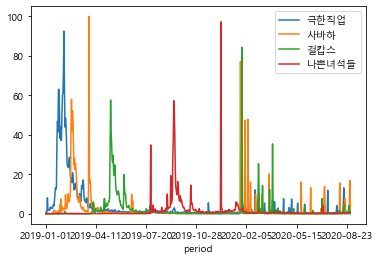

In [7]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
# ['백두산'],
#['기생충','봉준호','짜파구리'],
]
mdf = MyDataLab(keywords,'2019-01-01','2020-08-30','date')
print(mdf.head())
mdf.plot()
plt.show()

- 함수화 과정

In [8]:
nid = 'JRv5Bq7I5nPjMsJ3pdd3'
nkey = 'tuxU6A6cKW'

import json #####
import os
import sys
import urllib.request

client_id = nid #####
client_secret = nkey #####
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"]},
          {"groupName":"반도","keywords":["반도","CJ ENM"]}
    ]
    }"""
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)

    # ratio: 구간별 검색량의 상대적 비율. 구간별 결과에서 가장 큰 값을 100으로 설정.

{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"],"data":[{"period":"2019-01-01","ratio":0.99682},{"period":"2019-02-01","ratio":1.23235},{"period":"2019-03-01","ratio":1.03002},{"period":"2019-04-01","ratio":7.92022},{"period":"2019-05-01","ratio":46.82542},{"period":"2019-06-01","ratio":59.07226},{"period":"2019-07-01","ratio":11.90921},{"period":"2019-08-01","ratio":12.20851},{"period":"2019-09-01","ratio":4.86102},{"period":"2019-10-01","ratio":3.7481},{"period":"2019-11-01","ratio":5.34911},{"period":"2019-12-01","ratio":5.05451},{"period":"2020-01-01","ratio":20.11018},{"period":"2020-02-01","ratio":100},{"period":"2020-03-01","ratio":9.47802},{"period":"2020-04-01","ratio":5.92012},{"period":"2020-05-01","ratio":4.90204},{"period":"2020-06-01","ratio":4.35607},{"period":"2020-07-01","ratio":4.52975},{"period":"2020-08-01","ratio":4.40892}]},{"title":"반도","keywords":["반도","CJ ENM"],"data":[{"peri

2
       period     ratio
0  2019-01-01   0.99682
1  2019-02-01   1.23235
2  2019-03-01   1.03002
3  2019-04-01   7.92022
4  2019-05-01  46.82542


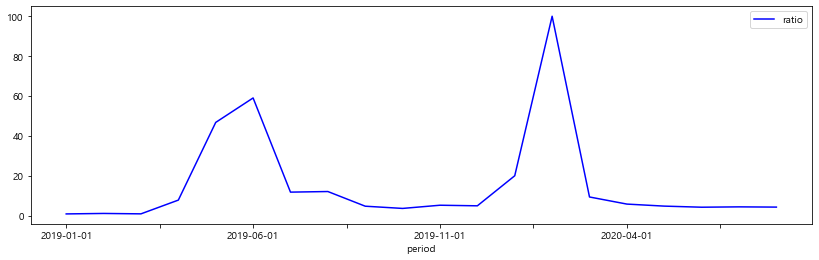

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

jdata=json.loads(res)

print(len(jdata['results']))
pdata=jdata['results'][0]['data']
cjdf=pd.DataFrame.from_dict(pdata)
print(cjdf.head())

# 시각화
# cjdf.plot()
plt.rcParams["figure.figsize"] = (14,4)
cjdf.plot(kind='line', x='period', y='ratio', color='Blue')
plt.legend()
plt.show()

### 1) 네이버 데이터랩과 주가 결합
- 함수
    + MyDBLab(keywords, '2019-01-01', '2020-08-30', 'month','035760')
         + 네이버 데이터랩 df와 주가 df 결합

In [10]:
import sqlite3
dbname='NaverStock.db'
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [11]:
# 특정 날짜, 특정 구간의 검색어 데이터 가져오기
def MyDBLab(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='month',scode='035760'):
    mdf=MyDataLab(keywords,sday,eday,tunit)
    
    sdaycode=sday.replace('-','')
    edaycode=eday.replace('-','')
    
    whsrc='where SDAY>={0} and SDAY<={1} and SCODE="{2}" order by SDAY  asc'
    whr=whsrc.format(sdaycode,edaycode,scode)
    res=selData(whr)
    cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
    dfsrc=pd.DataFrame(data=res,columns=cols)
    
    # dfsrc['period'] = dfsrc['SDAY'].apply(lambda x : str(x)[:4]+"-"+str(x)[4:-2]+"-"+str(x)[-2:])
    dfsrc['period']=[str(p)[:4]+"-"+str(p)[4:-2]+"-"+str(p)[-2:] for p in dfsrc['SDAY']]
    dfstock=dfsrc.set_index('period')
    
    df=pd.merge(dfstock,mdf,how="outer",left_index=True, right_index=True)
    alldf=df.interpolate() ############# 선형보간
    return alldf

In [12]:
keywords=[
['극한직업'],
#['사바하'],
#['걸캅스'],
#['나쁜녀석들'],
#['백두산'],
#['기생충','봉준호','짜파구리'],
]
alldf=MyDBLab(keywords,'2019-01-15','2019-02-15','date','035760')
alldf.head(10)

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,극한직업
period,,,,,,,
2019-01-15,20190115.0,211400.000000,212900.000000,208400.0,212900.0,54176.000000,4.04935
2019-01-16,20190116.0,213000.000000,217600.000000,211200.0,216000.0,82763.000000,5.14039
2019-01-17,20190117.0,214800.000000,215300.000000,205800.0,209100.0,66824.000000,4.38706
2019-01-18,20190118.0,208500.000000,208500.000000,202500.0,206500.0,74195.000000,7.29230
2019-01-19,20190119.0,207633.333333,208366.666667,203100.0,206200.0,66475.333333,10.99330
2019-01-20,20190120.0,206766.666667,208233.333333,203700.0,205900.0,58755.666667,14.18881
2019-01-21,20190121.0,205900.000000,208100.000000,204300.0,205600.0,51036.000000,13.45806
2019-01-22,20190122.0,205500.000000,206100.000000,203500.0,206000.0,33588.000000,15.23499
2019-01-23,20190123.0,205500.000000,205900.000000,203400.0,205800.0,48354.000000,40.86066


- 함수화 과정

In [13]:
import sqlite3
dbname='NaverStock.db'
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [14]:
whr='where SDAY>=20190101 and SDAY<=20200830 and SCODE="035760" order by SDAY  asc'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfcj=pd.DataFrame(data=res,columns=cols)
dfcj.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20190102,202700,202900,196500,196500,58208
1,20190103,196700,197500,190200,191200,69363
2,20190104,191200,192500,187400,191500,70378
3,20190107,192600,199400,192200,199400,64370
4,20190108,199500,200100,195600,195800,38965


In [15]:
dfcj['period'] = [str(p)[:4]+"-"+str(p)[4:-2]+"-"+str(p)[-2:] for p in dfcj['SDAY']]
dfstock = dfcj.set_index('period')
dfstock.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
period,,,,,,
2019-01-02,20190102,202700,202900,196500,196500,58208
2019-01-03,20190103,196700,197500,190200,191200,69363
2019-01-04,20190104,191200,192500,187400,191500,70378
2019-01-07,20190107,192600,199400,192200,199400,64370
2019-01-08,20190108,199500,200100,195600,195800,38965


In [16]:
alldf = pd.merge(dfstock,mdf,how='outer',left_index=True, right_index=True)
alldf.tail()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,극한직업,사바하,걸캅스,나쁜녀석들
period,,,,,,,,,,
2020-08-26,20200826.0,122300.0,124200.0,120200.0,121600.0,110258.0,0.61941,0.32782,0.11156,0.48503
2020-08-27,20200827.0,121900.0,121900.0,118000.0,118000.0,142667.0,0.53738,0.44058,4.21673,0.50665
2020-08-28,20200828.0,120300.0,121400.0,117500.0,118100.0,114817.0,0.46698,0.43804,0.17748,0.56765
2020-08-29,NaN,NaN,NaN,NaN,NaN,NaN,0.60211,17.04575,0.15720,0.83955
2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.56408,0.73798,0.13662,0.84522


### 2) 검색어와 주가의 상관도 시각화
- 함수
    + PltDBLab(alldf,keywords,ptitle="CJ ENM 영화와 주가의 상관도",xstep=10,axvpos=10)
        + 검색어(마케팅 이벤트)와 주가의 상관도 그래프

In [17]:
def PltDBLab(alldf,keywords,ptitle="CJ ENM 영화와 주가의 상관도",xstep=10,axvpos=10):
    xtic=np.arange(0,len(alldf.index),step=xstep)
    xdays=[alldf.index[i] for i in xtic]
    if(len(keywords)==1):
        setdf=alldf[keywords[0]]#,'사바하','걸캅스','나쁜녀석들','백두산'
    else:
        keys=[k[0] for k in keywords]
        setdf=alldf[keys]#,'사바하','걸캅스','나쁜녀석들','백두산'
    
    #setdf.head()
    font = {'family': fname,
            'color':  'aqua',
            'weight': 'normal',
            'size': 20,
            }
    # x 축을 공유하고 y축을 2중 사용
    plt.rcParams["figure.figsize"]=(12,6)
    fig, ax1=plt.subplots()
    plt.xticks(xtic,xdays,rotation=45)

    ax1.plot(alldf['CLOSEP'] ,color='black')
    ax1.set_ylabel("Price")
    ax2=ax1.twinx()
    ax2.set_ylabel("Ratio")
    setdf.plot(ax=ax2)
    pos=axvpos
    plt.axvline(pos,color='aquamarine',linestyle="--")
    plt.text(pos,20,"개봉",fontdict=font)
    plt.title(ptitle)
    plt.legend()
    fig.tight_layout()
    plt.show()

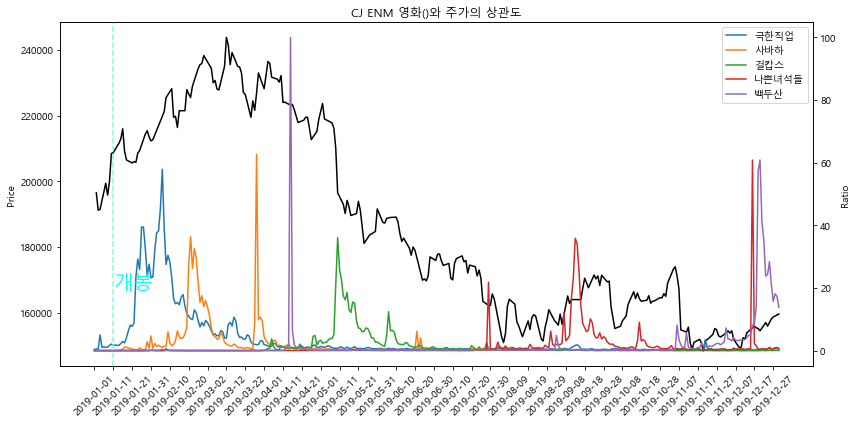

In [18]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
['백두산'],
#['기생충','봉준호','짜파구리'],
]
#MyDBLab(keywords)
alldf=MyDBLab(keywords,'2019-01-01','2019-12-30','date','035760')
#alldf.head()
PltDBLab(alldf,keywords,ptitle="CJ ENM 영화()와 주가의 상관도",xstep=10)

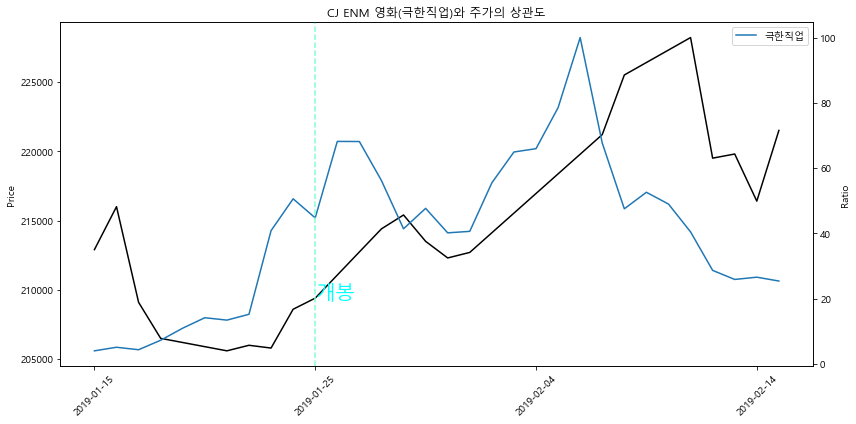

In [19]:
keywords=[
['극한직업'],
#['사바하'],
#['걸캅스'],
#['나쁜녀석들'],
#['백두산'],
#['기생충','봉준호','짜파구리'],
]
#MyDBLab(keywords)
alldf=MyDBLab(keywords,'2019-01-15','2019-02-15','date','035760')
#alldf.head()
PltDBLab(alldf,keywords,"CJ ENM 영화(극한직업)와 주가의 상관도",xstep=10)

- 함수화 과정

In [20]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
['백두산'],
#['기생충','봉준호','짜파구리'],
]
alldf = MyDBLab(keywords,'2019-01-01','2019-12-30','date','035760')
alldf.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,극한직업,사바하,걸캅스,나쁜녀석들,백두산
period,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.51273,0.03758,0.01178,0.15669,0.14547
2019-01-02,20190102.0,202700.000000,202900.0,196500.0,196500.000000,58208.000000,0.59014,0.03655,0.01355,0.14220,0.11658
2019-01-03,20190103.0,196700.000000,197500.0,190200.0,191200.000000,69363.000000,0.57528,0.02870,0.00981,0.11350,0.10892
2019-01-04,20190104.0,191200.000000,192500.0,187400.0,191500.000000,70378.000000,5.09767,0.02758,0.01552,0.12453,0.10172
2019-01-05,20190105.0,191666.666667,194800.0,189000.0,194133.333333,68375.333333,1.13232,0.03300,0.01299,0.14248,0.08695


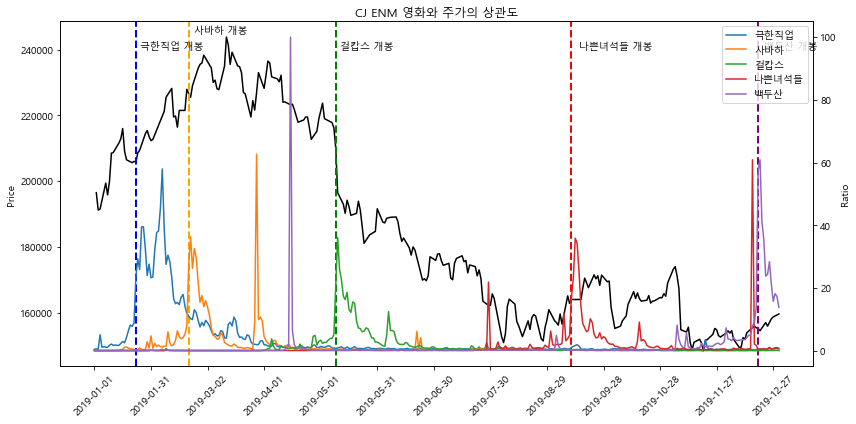

In [21]:
xtic = np.arange(0,len(alldf.index),step=30)  # 인터벌 생성
xdays = [alldf.index[i] for i in xtic]
setdf = alldf[['극한직업','사바하','걸캅스','나쁜녀석들','백두산']]
font = {'family': fname,
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# setdf.head()
# x축 공유, y축을 2중 사용
plt.rcParams["figure.figsize"]=(12,6)
fig, ax1 = plt.subplots()

# x축 다듬기
plt.xticks(xtic,xdays,rotation=45)

# 주가 그래프
ax1.plot(alldf['CLOSEP'], color='k')

# 영화 개봉일 수직선 그리기
ax1.axvline(x='2019-01-23',label='극한직업 개봉', c="b", linestyle='--',  linewidth=2)         # 극한직업 개봉일 2019년 1월 23일
plt.text(24,240000,"극한직업 개봉")
ax1.axvline(x='2019-02-20',label='사바하 개봉',color='orange',linestyle='--',  linewidth=2)    # 사바하 개봉일 2019년 2월 20일
plt.text(53,245000,"사바하 개봉")
ax1.axvline(x='2019-05-09',label='걸캅스 개봉',color='green',linestyle='--',  linewidth=2)     # 걸캅스 개봉일 2019년 5월 9일
plt.text(130,240000,"걸캅스 개봉")
ax1.axvline(x='2019-09-11',label='나쁜녀석들 개봉',c='r',linestyle='--',  linewidth=2)         # 나쁜녀석들 개봉일 2019년 9월 11일
plt.text(257,240000,"나쁜녀석들 개봉")
ax1.axvline(x='2019-12-19',label='백두산 개봉',color='purple',linestyle='--',  linewidth=2)    # 백두산 개봉일 2019년 12월 19일
plt.text(355,240000,"백두산 개봉")

ax1.set_ylabel("Price")

# 검색어 그래프
ax2  = ax1.twinx()
ax2.set_ylabel("Ratio")

setdf.plot(ax=ax2)
# pos=10
# plt.axvline(pos)
# plt.text(pos,20,"런칭",fontdict=font)
plt.title("CJ ENM 영화와 주가의 상관도")
fig.tight_layout()
plt.show()

### 3) 검색어와 주가의 상관도 조정
- 마케팅 이벤트 > 검색어 증가 > 5일 이후 주가
- 시계열 분석에 관련된 가설 검증법 필요

- 함수
    + shiftGraph(shiftall,baseCol,ptitle='shift 결과',axvpos=10,textpos=20,xstep=10)
        + shift한 df를 시각화
    + shiftLab(alldf,baseCol='극한직업',shiftday=5)
        + 검색어 결과를 n일 뒤로 shift하고 주가(종가)와 상관관계 분석 및 시각화

#### - 통계량 분석
###### 피어슨 상관계수
* 피어슨 상관 계수(Pearson Correlation Coefficient ,PCC)
* 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치
* 피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가짐
* +1은 완벽한 양의 선형 상관 관계
* 0은 선형 상관 관계 없음
* -1은 완벽한 음의 선형 상관 관계

In [22]:
def shiftGraph(shiftall,baseCol,ptitle='shift 결과',axvpos=10,textpos=20,xstep=10):
    font = {'family': fname,
            'color':  'aqua',
            'weight': 'normal',
            'size': 20,
            }
    xtic=np.arange(0,len(shiftall.index),step=10)
    xdays=[shiftall.index[i] for i in xtic]
    sdf=shiftall[baseCol+'_shift']#,'사바하','걸캅스','나쁜녀석들','백두산'
    plt.rcParams["figure.figsize"]=(12,6)
    fig, ax1=plt.subplots()
    plt.xticks(xtic,xdays,rotation=45)
    ax1.plot(shiftall['CLOSEP'] ,color='black')
    ax1.set_ylabel("Price")
    ax2=ax1.twinx()
    ax2.set_ylabel("Ratio")
    sdf.plot(ax=ax2)
    plt.axvline(axvpos,color='aquamarine',linestyle="--")
    plt.text(axvpos,textpos,"개봉",fontdict=font)
    plt.title(ptitle)
    plt.legend()
    fig.tight_layout()
    plt.show()

In [23]:
def shiftLab(alldf,baseCol='극한직업',shiftday=5):
    # 기존 정보상의 상관분석 - 효과 적음
    checkdf=alldf[['CLOSEP',baseCol]]
    print("*"*40)
    print(checkdf.describe())
    print("*"*40)
    print(checkdf.corr())

    # 쉬프트 정보 작성
    checkdf.columns=['CLOSEP',baseCol+'_shift']
    # shiftdf=checkdf[baseCol+'_shift'].shift(shiftday,fill_value=0)
    shiftdf=checkdf[''+baseCol+'_shift'].shift(shiftday,fill_value=0)
    
    # 기존 데이터와 병합 작성
    shiftall=pd.merge(alldf,shiftdf,how="inner",left_index=True,right_index=True)
    check5=shiftall[['CLOSEP',baseCol+'_shift']]
    # 새로운 상관분석
    print("*"*40)
    print(check5.corr())
    print("*"*40)

    shiftGraph(shiftall,baseCol)

****************************************
              CLOSEP        극한직업
count     363.000000  364.000000
mean   185904.958678    3.565214
std     28713.004948    7.875018
min    148400.000000    0.284600
25%    160350.000000    0.498282
50%    175900.000000    0.705420
75%    215766.666667    1.740698
max    243800.000000   57.946580
****************************************
          CLOSEP      극한직업
CLOSEP  1.000000  0.450908
극한직업    0.450908  1.000000
****************************************
              CLOSEP  극한직업_shift
CLOSEP      1.000000    0.483078
극한직업_shift  0.483078    1.000000
****************************************


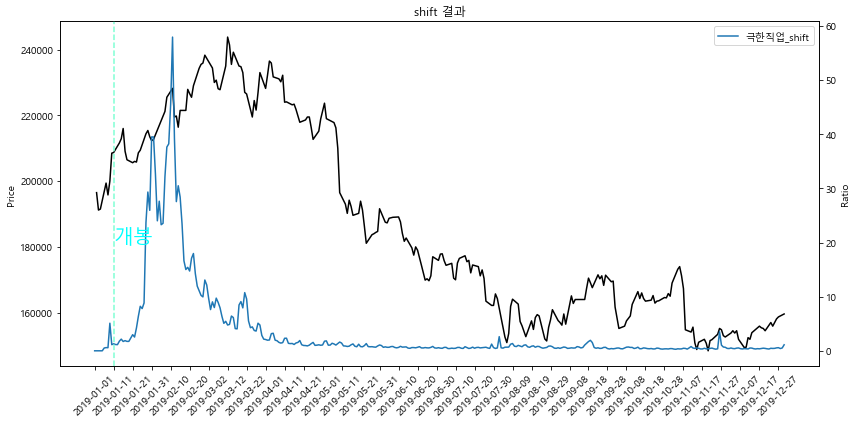

In [24]:
shiftLab(alldf,'극한직업',5)

- 함수화 과정

In [25]:
# 먼저 종가와 검색어 수의 상관관계 보기
checkdf=alldf[['CLOSEP','극한직업']]
checkdf.corr()

,CLOSEP,극한직업
CLOSEP,1.000000,0.450908
극한직업,0.450908,1.000000


In [26]:
# checkdf를 5일 밀기
checkdf.columns=['CLOSEP','극한직업_shift']
shiftdf=checkdf['극한직업_shift'].shift(5,fill_value=0)
shiftdf.head(10)

period
2019-01-01    0.00000
2019-01-02    0.00000
2019-01-03    0.00000
2019-01-04    0.00000
2019-01-05    0.00000
2019-01-06    0.51273
2019-01-07    0.59014
2019-01-08    0.57528
2019-01-09    5.09767
2019-01-10    1.13232
Name: 극한직업_shift, dtype: float64

In [27]:
alldf.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,극한직업,사바하,걸캅스,나쁜녀석들,백두산
period,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.51273,0.03758,0.01178,0.15669,0.14547
2019-01-02,20190102.0,202700.000000,202900.0,196500.0,196500.000000,58208.000000,0.59014,0.03655,0.01355,0.14220,0.11658
2019-01-03,20190103.0,196700.000000,197500.0,190200.0,191200.000000,69363.000000,0.57528,0.02870,0.00981,0.11350,0.10892
2019-01-04,20190104.0,191200.000000,192500.0,187400.0,191500.000000,70378.000000,5.09767,0.02758,0.01552,0.12453,0.10172
2019-01-05,20190105.0,191666.666667,194800.0,189000.0,194133.333333,68375.333333,1.13232,0.03300,0.01299,0.14248,0.08695


In [28]:
# merge
shiftall=pd.merge(alldf,shiftdf,how="inner",left_index=True,right_index=True)
shiftall.head(10)

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,극한직업,사바하,걸캅스,나쁜녀석들,백두산,극한직업_shift
period,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.51273,0.03758,0.01178,0.15669,0.14547,0.00000
2019-01-02,20190102.0,202700.000000,202900.0,196500.0,196500.000000,58208.000000,0.59014,0.03655,0.01355,0.14220,0.11658,0.00000
2019-01-03,20190103.0,196700.000000,197500.0,190200.0,191200.000000,69363.000000,0.57528,0.02870,0.00981,0.11350,0.10892,0.00000
2019-01-04,20190104.0,191200.000000,192500.0,187400.0,191500.000000,70378.000000,5.09767,0.02758,0.01552,0.12453,0.10172,0.00000
2019-01-05,20190105.0,191666.666667,194800.0,189000.0,194133.333333,68375.333333,1.13232,0.03300,0.01299,0.14248,0.08695,0.00000
2019-01-06,20190106.0,192133.333333,197100.0,190600.0,196766.666667,66372.666667,1.29968,0.02982,0.01234,0.15510,0.09415,0.51273
2019-01-07,20190107.0,192600.000000,199400.0,192200.0,199400.000000,64370.000000,1.15560,0.02617,0.00981,0.14931,0.10621,0.59014
2019-01-08,20190108.0,199500.000000,200100.0,195600.0,195800.000000,38965.000000,1.14195,0.03076,0.01505,0.14996,0.10667,0.57528
2019-01-09,20190109.0,196000.000000,203100.0,196000.0,200000.000000,56144.000000,1.77735,0.02702,0.01280,0.14800,0.10032,5.09767


In [29]:
# shift한 검색어와 종가 상관관계 보기
check5=shiftall[['CLOSEP','극한직업_shift']]
check5.corr()

,CLOSEP,극한직업_shift
CLOSEP,1.000000,0.483078
극한직업_shift,0.483078,1.000000


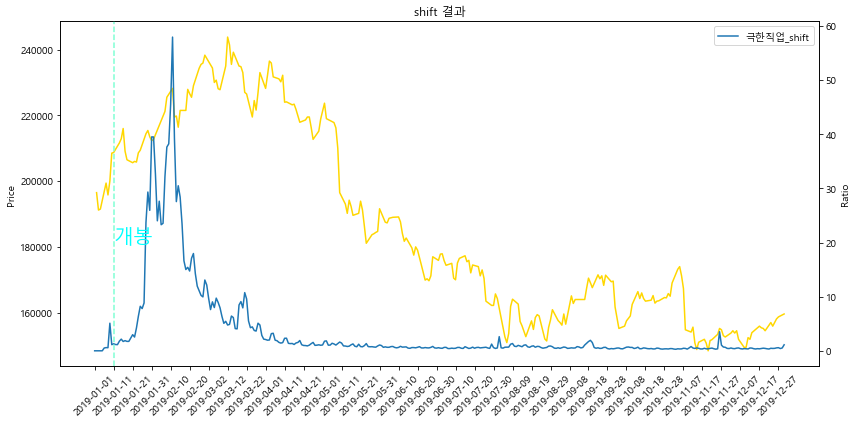

In [30]:
# 시각화하기
ptitle='shift 결과'
font = {'family': fname,
        'color':  'aqua',
        'weight': 'normal',
        'size': 20,
        }
xtic=np.arange(0,len(shiftall.index),step=10)
xdays=[shiftall.index[i] for i in xtic]
sdf=shiftall['극한직업_shift']#,'사바하','걸캅스','나쁜녀석들','백두산'
plt.rcParams["figure.figsize"]=(12,6)
fig, ax1=plt.subplots()
plt.xticks(xtic,xdays,rotation=45)
ax1.plot(shiftall['CLOSEP'] ,color='gold')
ax1.set_ylabel("Price")
ax2=ax1.twinx()
ax2.set_ylabel("Ratio")
sdf.plot(ax=ax2)
pos=10
plt.axvline(pos,color='aquamarine',linestyle="--")
plt.text(10,20,"개봉",fontdict=font)
plt.title(ptitle)
plt.legend()
fig.tight_layout()
plt.show()

****************************************
          CLOSEP      극한직업
CLOSEP  1.000000  0.450908
극한직업    0.450908  1.000000
****************************************
              CLOSEP  극한직업_shift
CLOSEP      1.000000    0.483078
극한직업_shift  0.483078    1.000000
****************************************


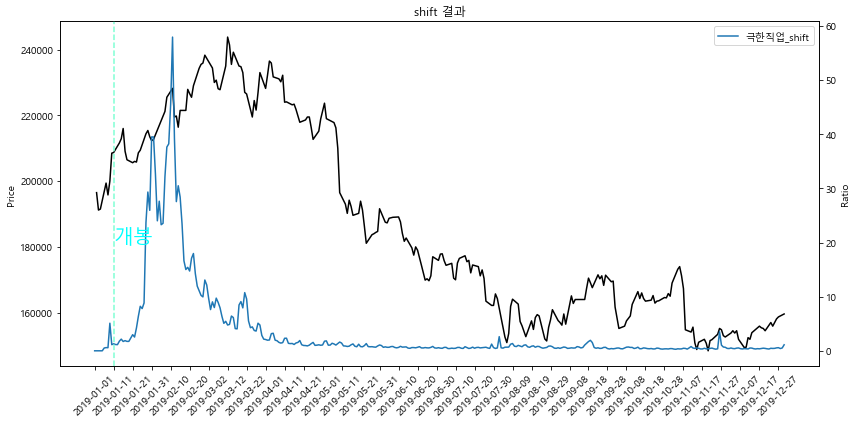

In [31]:
baseCol = '극한직업'
shiftday=5
# 기존 정보상의 상관분석 - 효과 적음
checkdf = alldf[['CLOSEP',baseCol]]
print("*"*40)
print(checkdf.corr())

# 쉬프트 정보 작성
checkdf.columns = ['CLOSEP',baseCol+'_shift']
shiftdf = checkdf[baseCol+'_shift'].shift(shiftday,fill_value=0)
shiftdf.head(10)

# 기존 데이터와 병합 작성 
shiftall = pd.merge(alldf,shiftdf,how="inner",left_index=True, right_index=True)
check5 = shiftall[['CLOSEP',baseCol+'_shift']]

# 새로운 상관분석
print("*"*40)
print(check5.corr())
print("*"*40)
shiftGraph(shiftall,baseCol)

### 4) 최종 함수 실습하기

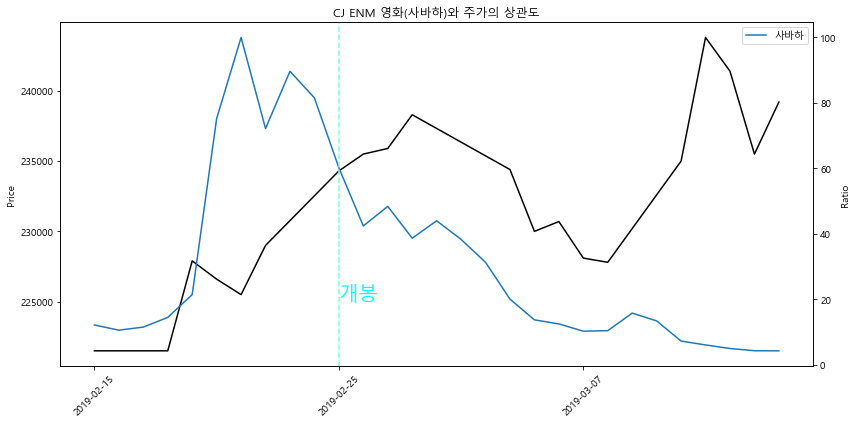

****************************************
              CLOSEP         사바하
count      29.000000   29.000000
mean   231725.862069   31.584496
std      6028.340535   28.601482
min    221500.000000    4.310830
25%    227900.000000   10.618500
50%    232533.333333   15.825840
75%    235500.000000   44.022350
max    243800.000000  100.000000
****************************************
          CLOSEP       사바하
CLOSEP  1.000000 -0.078005
사바하    -0.078005  1.000000
****************************************
             CLOSEP  사바하_shift
CLOSEP     1.000000   0.473025
사바하_shift  0.473025   1.000000
****************************************


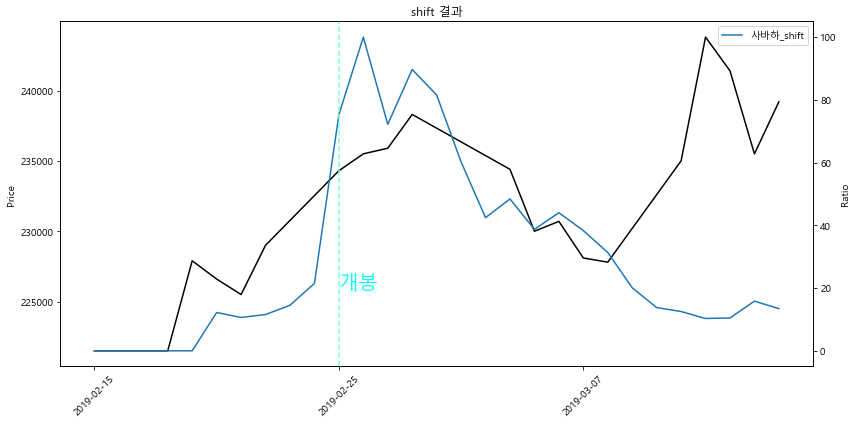

In [32]:
keywords=[
#['극한직업'],
['사바하'],
#['걸캅스'],
#['나쁜녀석들'],
#['백두산'],
#['기생충','봉준호','짜파구리'],
]
alldf=MyDBLab(keywords,'2019-02-15','2019-03-15','date','035760')
#alldf.head()
PltDBLab(alldf,keywords,"CJ ENM 영화(사바하)와 주가의 상관도",xstep=10)
shiftLab(alldf,'사바하',5)

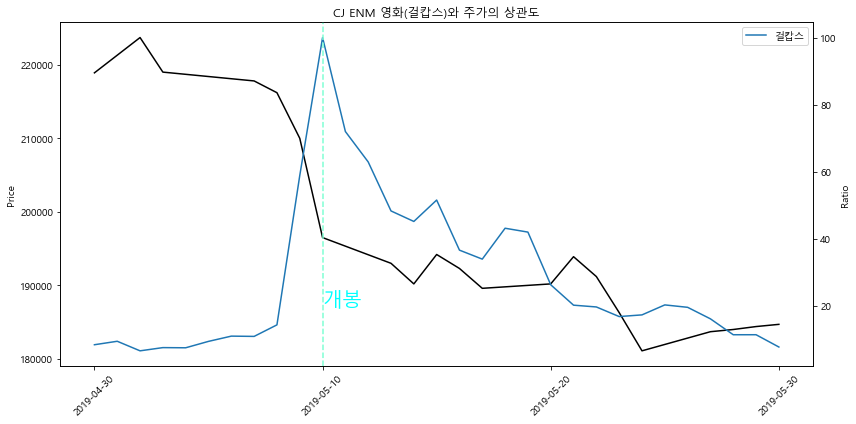

****************************************
              CLOSEP         걸캅스
count      31.000000   31.000000
mean   198435.483871   27.915010
std     14543.844149   22.981514
min    181100.000000    6.552710
25%    187950.000000   10.895965
50%    193000.000000   19.531630
75%    217000.000000   42.542740
max    223700.000000  100.000000
****************************************
          CLOSEP       걸캅스
CLOSEP  1.000000 -0.263372
걸캅스    -0.263372  1.000000
****************************************
             CLOSEP  걸캅스_shift
CLOSEP     1.000000  -0.560901
걸캅스_shift -0.560901   1.000000
****************************************


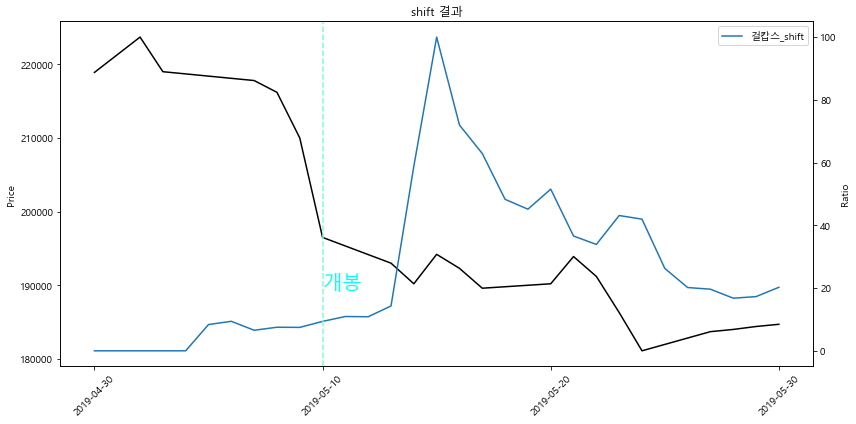

In [33]:
keywords=[
#'극한직업'],
#'사바하'],
['걸캅스'],
#['나쁜녀석들'],
#['백두산'],
#['기생충','봉준호','짜파구리'],
]
alldf=MyDBLab(keywords,'2019-04-30','2019-05-30','date','035760')
#alldf.head()
PltDBLab(alldf,keywords,"CJ ENM 영화(걸캅스)와 주가의 상관도",xstep=10)
shiftLab(alldf,'걸캅스',5)

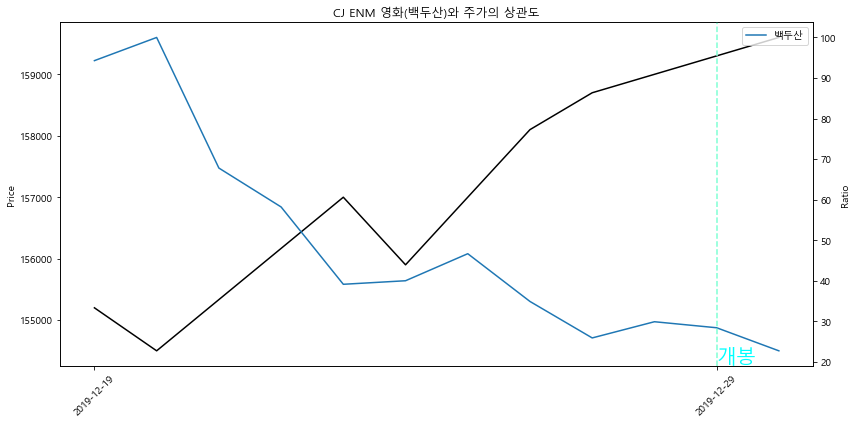

****************************************
              CLOSEP         백두산
count      12.000000   12.000000
mean   157150.000000   49.003385
std      1759.447801   26.080540
min    154500.000000   22.738520
25%    155758.333333   29.540028
50%    157000.000000   39.579605
75%    158775.000000   60.609005
max    159600.000000  100.000000
****************************************
         CLOSEP      백두산
CLOSEP  1.00000 -0.88492
백두산    -0.88492  1.00000
****************************************
             CLOSEP  백두산_shift
CLOSEP     1.000000   0.404196
백두산_shift  0.404196   1.000000
****************************************


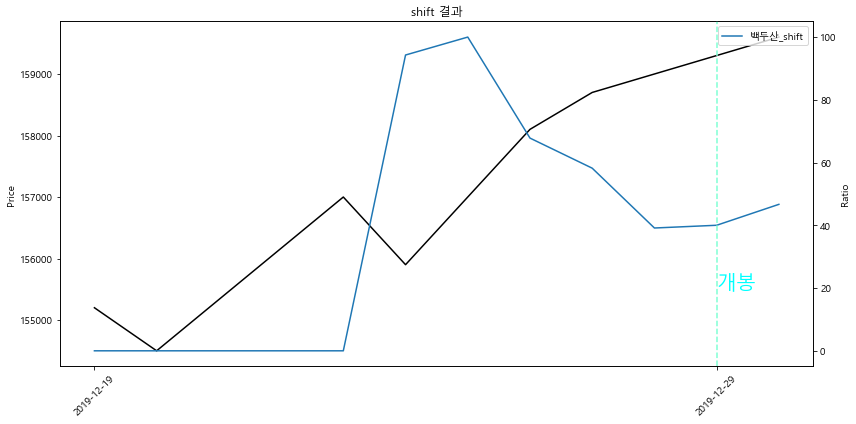

In [34]:
keywords=[
#'극한직업'],
#'사바하'],
#['걸캅스'],
#['나쁜녀석들'],
['백두산'],
#['기생충','봉준호','짜파구리'],
]
alldf=MyDBLab(keywords,'2019-12-19','2019-12-30','date','035760')
#alldf.head()
PltDBLab(alldf,keywords,"CJ ENM 영화(백두산)와 주가의 상관도",xstep=10)
shiftLab(alldf,'백두산',5)